In [1]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import pandas as pd
import numpy as np

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(37)
tf.random.set_seed(89)

from skimage.io import imread_collection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the train data
images = np.array(imread_collection(r'Train\*.jpg'))
Train = np.zeros((2400, 784))
for i in range(len(images)):
    Train[i] = images[i].flatten()
Train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
#Reading the train labels
Train_Labels = np.loadtxt(r'Train\Training Labels.txt', dtype=int)
Train_Labels

array([0, 0, 0, ..., 9, 9, 9])

In [5]:
#Reading the test data
images = np.array(imread_collection(r'Test\*.jpg'))
Test = np.zeros((200, 784))
for i in range(len(images)):
    Test[i] = images[i].flatten()
Test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 5., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
#Reading the test labels
Test_Labels = np.loadtxt(r'Test\Test Labels.txt', dtype=int)
Test_Labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [7]:
#Variables Setup
X_train = tf.convert_to_tensor(Train, dtype=tf.float32)
targets=[]
for k in range(0,len(Train_Labels)):
    x=[0,0,0,0,0,0,0,0,0,0]
    index=Train_Labels[k]
    x[index]=1
    targets.append(x)
Y_train = tf.convert_to_tensor(targets, dtype=tf.float32)


X_test = tf.convert_to_tensor(Test, dtype=tf.float32)
targets2=[]
for k in range(0,len(Test_Labels)):
    x=[0,0,0,0,0,0,0,0,0,0]
    index=Test_Labels[k]
    x[index]=1
    targets2.append(x)
Y_test = tf.convert_to_tensor(targets2, dtype=tf.float32)

#Standardizing the data
Scaler = StandardScaler()
Standard1 = Scaler.fit_transform(X_train)
Standard_train = tf.convert_to_tensor(Standard1, dtype=tf.float32)

Standard2 = Scaler.transform(X_test)
Standard_test = tf.convert_to_tensor(Standard2, dtype=tf.float32)

# Configuration 1 (100 epochs)

In [8]:
#Training phase
#Defining our network
model1 = keras.Sequential()

#Hidden Layer
model1.add(layers.Dense(
    500, # Amount of Neurons
    activation = 'relu'
))

#Output Layer
model1.add(layers.Dense(
    units = 10, # outputs (digits)
    activation = 'sigmoid'
))

# Compile the layers into a model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(
    loss = 'mean_squared_error',
    optimizer = optimizer
)

#Training the model
model1.fit(
    Standard_train,
    Y_train,
    epochs=100, # Amount of iterations we want to train for
)

Epoch 1/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 8/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 9/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 10/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 11/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 12/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 13/100
75/75 [=================

7/7 [==============================] - 0s 1ms/step
Accuracy 1 is: 90.5 %


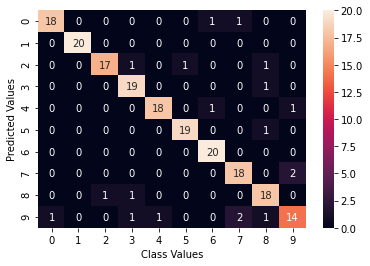

In [9]:
#Predecting phase
prediction = model1.predict([Standard_test])
final_prediction = []
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i]))
    
accuracy = (accuracy_score(Test_Labels,final_prediction)*100)
print("Accuracy 1 is:",accuracy,"%")

cm = confusion_matrix(Test_Labels,final_prediction)
sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.show()

# Configuration 2

In [10]:
#Training phase
#Defining our network
keras.backend.clear_session()
model2 = keras.Sequential()

#Hidden Layer
model2.add(layers.Dense(
    500, # Amount of Neurons
    activation = 'relu'
))

#Output Layer
model2.add(layers.Dense(
    10, # outputs (digits)
    activation = 'sigmoid'
))

# Compile the layers into a model
model2.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
)

#Training the model
model2.fit(
    Standard_train,
    Y_train,
    epochs=200, # Amount of iterations we want to train for
)

Epoch 1/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 9.6210e-04
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 8.7227e-04
Epoch 11/200
75/75 [==============================] - 0s 2ms/step - loss: 8.3486e-04
Epoch 12/200
75/75 [==============================] - 0s 2ms/step - loss: 7.8205e-04
Epoch 13/200
75/75 [=

7/7 [==============================] - 0s 1ms/step
Accuracy 2 is: 92.0 %


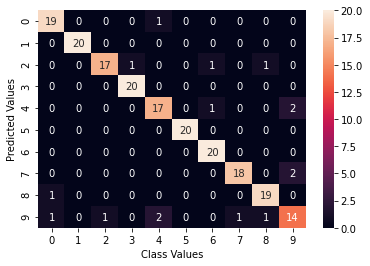

In [11]:
#Predecting phase
prediction = model2.predict([Standard_test])
final_prediction = []
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i]))

accuracy = (accuracy_score(Test_Labels,final_prediction)*100)
print("Accuracy 2 is:",accuracy,"%")

cm = confusion_matrix(Test_Labels,final_prediction)
sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.show()

# Configuration 3 (Non-Standardized)

In [12]:
#Training phase
#Defining our network
keras.backend.clear_session()
model3 = keras.Sequential()

#Hidden Layer
model3.add(layers.Dense(
    500, # Amount of Neurons
    activation = 'relu'
))

#Output Layer
model3.add(layers.Dense(
    10, # outputs (digits)
    activation = 'sigmoid'
))

# Compile the layers into a model
model3.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
)

#Training the model
model3.fit(
    X_train,
    Y_train,
    epochs=200, # Amount of iterations we want to train for
)

Epoch 1/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1621
Epoch 2/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 5/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 8/200
75/75 [==============================] - 0s 3ms/step - loss: 0.1000
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 11/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 12/200
75/75 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 13/200
75/75 [=================

7/7 [==============================] - 0s 1ms/step
Accuracy 3 is: 10.0 %


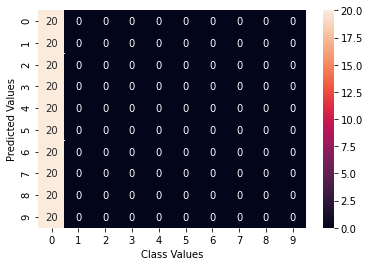

In [13]:
#Predecting phase
prediction = model3.predict([X_test])
final_prediction = []
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i]))

accuracy = (accuracy_score(Test_Labels,final_prediction)*100)
print("Accuracy 3 is:",accuracy,"%")

cm = confusion_matrix(Test_Labels,final_prediction)
sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.show()

# Configuration 4 (n=0.01)

In [14]:
#Training phase
#Defining our network
keras.backend.clear_session()
model4 = keras.Sequential()

#Hidden Layer
model4.add(layers.Dense(
    500, # Amount of Neurons
    activation = 'relu'
))

#Output Layer
model4.add(layers.Dense(
    10, # outputs (digits)
    activation = 'sigmoid'
))

# Compile the layers into a model
model4.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
)

#Training the model
model4.fit(
    Standard_train,
    Y_train,
    epochs=200, # Amount of iterations we want to train for
)

Epoch 1/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 11/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 12/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 13/200
75/75 [=================

7/7 [==============================] - 0s 1ms/step
Accuracy 4 is: 44.5 %


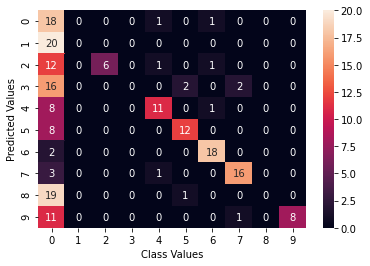

In [15]:
#Predecting phase
prediction = model4.predict([Standard_test])
final_prediction = []
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i]))

accuracy = (accuracy_score(Test_Labels,final_prediction)*100)
print("Accuracy 4 is:",accuracy,"%")

cm = confusion_matrix(Test_Labels,final_prediction)
sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.show()

# Configuration 5 (n=0.0005)

In [16]:
#Training phase
#Defining our network
keras.backend.clear_session()
model5 = keras.Sequential()

#Hidden Layer
model5.add(layers.Dense(
    500, # Amount of Neurons
    activation = 'relu'
))

#Output Layer
model5.add(layers.Dense(
    10, # outputs (digits)
    activation = 'sigmoid'
))

# Compile the layers into a model
model5.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(learning_rate=0.0005)
)

#Training the model
model5.fit(
    Standard_train,
    Y_train,
    epochs=200, # Amount of iterations we want to train for
)

Epoch 1/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 11/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 12/200
75/75 [==============================] - 0s 2ms/step - loss: 9.6290e-04
Epoch 13/200
75/75 [=============

7/7 [==============================] - 0s 1ms/step
Accuracy 5 is: 92.5 %


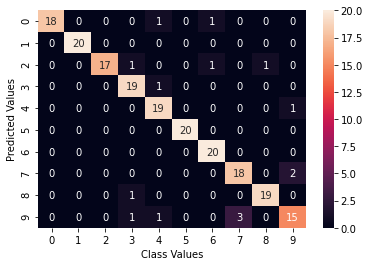

In [17]:
#Predecting phase
prediction = model5.predict([Standard_test])
final_prediction = []
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i]))

accuracy = (accuracy_score(Test_Labels,final_prediction)*100)
print("Accuracy 5 is:",accuracy,"%")

cm = confusion_matrix(Test_Labels,final_prediction)
sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.show()

# Configuration 6 (2 hidden layers)

In [18]:
#Training phase
#Defining our network
keras.backend.clear_session()
model6 = keras.Sequential()

#1st Hidden Layer
model6.add(layers.Dense(
    500, # Amount of Neurons
    activation = 'relu'
))

#2nd Hidden Layer
model6.add(layers.Dense(
    100, # Amount of Neurons
    activation = 'relu'
))

#Output Layer
model6.add(layers.Dense(
    10, # outputs (digits)
    activation = 'sigmoid'
))

# Compile the layers into a model
model6.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
)

#Training the model
model6.fit(
    Standard_train,
    Y_train,
    epochs=200, # Amount of iterations we want to train for
)

Epoch 1/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 9.7557e-04
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 8.4597e-04
Epoch 11/200
75/75 [==============================] - 0s 2ms/step - loss: 7.9615e-04
Epoch 12/200
75/75 [==============================] - 0s 2ms/step - loss: 7.8474e-04
Epoch 13/200
75/75 [=

7/7 [==============================] - 0s 1ms/step
Accuracy 6 is: 91.0 %


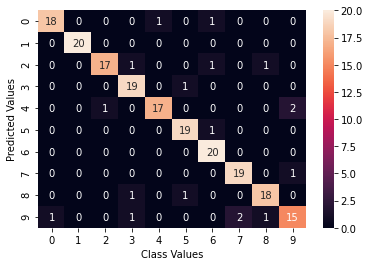

In [19]:
#Predecting phase
prediction = model6.predict([Standard_test])
final_prediction = []
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i]))

accuracy = (accuracy_score(Test_Labels,final_prediction)*100)
print("Accuracy 6 is:",accuracy,"%")

cm = confusion_matrix(Test_Labels,final_prediction)
sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.show()

# Configuration 7 (3 hidden layers)

In [20]:
#Training phase
#Defining our network
keras.backend.clear_session()
model7 = keras.Sequential()

#1st Hidden Layer
model7.add(layers.Dense(
    500, # Amount of Neurons
    activation = 'relu'
))

#2nd Hidden Layer
model7.add(layers.Dense(
    100, # Amount of Neurons
    activation = 'relu'
))

#3rd Hidden Layer
model7.add(layers.Dense(
    50, # Amount of Neurons
    activation = 'relu'
))

#Output Layer
model7.add(layers.Dense(
    10, # outputs (digits)
    activation = 'sigmoid'
))

# Compile the layers into a model
model7.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
)

#Training the model
model7.fit(
    Standard_train,
    Y_train,
    epochs=200, # Amount of iterations we want to train for
)

Epoch 1/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 4/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 5/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 9.9251e-04
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 9.0779e-04
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 8.0957e-04
Epoch 10/200
75/75 [==============================] - 0s 3ms/step - loss: 8.0039e-04
Epoch 11/200
75/75 [==============================] - 0s 2ms/step - loss: 8.8211e-04
Epoch 12/200
75/75 [==============================] - 0s 2ms/step - loss: 6.7641e-04
Epoch 13/200


7/7 [==============================] - 0s 1ms/step
Accuracy 7 is: 90.0 %


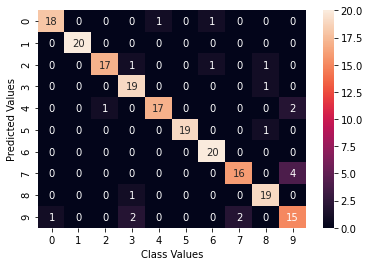

In [21]:
#Predecting phase
prediction = model7.predict([Standard_test])
final_prediction = []
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i]))

accuracy = (accuracy_score(Test_Labels,final_prediction)*100)
print("Accuracy 7 is:",accuracy,"%")

cm = confusion_matrix(Test_Labels,final_prediction)
sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.show()

# Configuration 8 (4 hidden layers)

In [22]:
#Training phase
#Defining our network
keras.backend.clear_session()
model8 = keras.Sequential()

#1st Hidden Layer
model8.add(layers.Dense(
    500, # Amount of Neurons
    activation = 'relu'
))

#2nd Hidden Layer
model8.add(layers.Dense(
    100, # Amount of Neurons
    activation = 'relu'
))

#3rd Hidden Layer
model8.add(layers.Dense(
    50, # Amount of Neurons
    activation = 'relu'
))

#4th Hidden Layer
model8.add(layers.Dense(
    25, # Amount of Neurons
    activation = 'relu'
))

#Output Layer
model8.add(layers.Dense(
    10, # outputs (digits)
    activation = 'sigmoid'
))

# Compile the layers into a model
model8.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
)

#Training the model
model8.fit(
    Standard_train,
    Y_train,
    epochs=200, # Amount of iterations we want to train for
)

Epoch 1/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 3/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 4/200
75/75 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 7.5920e-04
Epoch 9/200
75/75 [==============================] - 0s 3ms/step - loss: 6.3586e-04
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 5.7885e-04
Epoch 11/200
75/75 [==============================] - 0s 2ms/step - loss: 5.6360e-04
Epoch 12/200
75/75 [==============================] - 0s 3ms/step - loss: 5.2050e-04
Epoch 13/200
75/7

7/7 [==============================] - 0s 1ms/step
Accuracy 8 is: 92.0 %


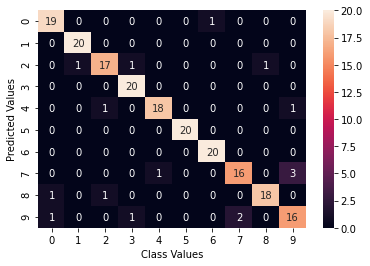

In [23]:
#Predecting phase
prediction = model8.predict([Standard_test])
final_prediction = []
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i]))

accuracy = (accuracy_score(Test_Labels,final_prediction)*100)
print("Accuracy 8 is:",accuracy,"%")

cm = confusion_matrix(Test_Labels,final_prediction)
sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.show()

# Configuration 9 (4 hidden layers, 2 epochs, 1 batch size)

In [24]:
#Training phase
#Defining our network
keras.backend.clear_session()
model9 = keras.Sequential()

#1st Hidden Layer
model9.add(layers.Dense(
    500, # Amount of Neurons
    activation = 'relu'
))

#2nd Hidden Layer
model9.add(layers.Dense(
    100, # Amount of Neurons
    activation = 'relu'
))

#3rd Hidden Layer
model9.add(layers.Dense(
    50, # Amount of Neurons
    activation = 'relu'
))

#4th Hidden Layer
model9.add(layers.Dense(
    25, # Amount of Neurons
    activation = 'relu'
))

#Output Layer
model9.add(layers.Dense(
    10, # outputs (digits)
    activation = 'sigmoid'
))

# Compile the layers into a model
model9.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
)

#Training the model
model9.fit(
    Standard_train,
    Y_train,
    batch_size=1,
    epochs=2, # Amount of iterations we want to train for
)

Epoch 1/2
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0467
Epoch 2/2
2400/2400 [==============================] - 4s 2ms/step - loss: 0.0325


7/7 [==============================] - 0s 1ms/step
Accuracy 9 is: 85.5 %


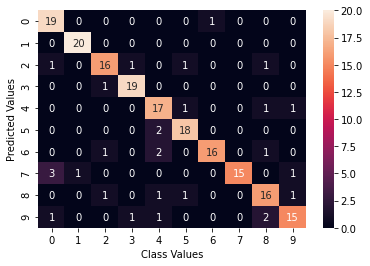

In [25]:
#Predecting phase
prediction = model9.predict([Standard_test])
final_prediction = []
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i]))

accuracy = (accuracy_score(Test_Labels,final_prediction)*100)
print("Accuracy 9 is:",accuracy,"%")

cm = confusion_matrix(Test_Labels,final_prediction)
sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')
plt.show()